## Feature importance and selection

In [30]:
train = pd.read_csv('datasets/titanic_train_ana.csv')

In [32]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,A,B,C,D,E,F,G,X,C.1,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,1


In [39]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import scipy.stats

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

model = DecisionTreeRegressor()

rs = RandomizedSearchCV(model,
                  {'max_depth': scipy.stats.binom(9, .3, loc=1),
                  'min_samples_split': scipy.stats.binom(90, .5, loc=10)},
                   cv=5,
                   n_iter=200,
                   n_jobs=4,
                   scoring='neg_mean_squared_error')

rs.fit(X_train, y_train)
print(r2_score(y_test, rs.best_estimator_.predict(scaler.transform(X_test))))

list(zip(X.columns, rs.best_estimator_.feature_importances_))

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.38700280314447266


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


[('Pclass', 0.203960464606408),
 ('Age', 0.07632546069896436),
 ('SibSp', 0.0),
 ('Parch', 0.0),
 ('Fare', 0.0959562244011198),
 ('female', 0.6237578502935079),
 ('male', 0.0),
 ('A', 0.0),
 ('B', 0.0),
 ('C', 0.0),
 ('D', 0.0),
 ('E', 0.0),
 ('F', 0.0),
 ('G', 0.0),
 ('X', 0.0),
 ('C.1', 0.0),
 ('Q', 0.0),
 ('S', 0.0)]

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

lin_reg = LinearRegression().fit(X_train, y_train)

print(r2_score(y_test, lin_reg.predict(scaler.transform(X_test))))

list(zip(X.columns, abs(lin_reg.coef_) / sum(abs(lin_reg.coef_))))

0.35633779870498417


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


[('Pclass', 1.5756677561974992e-15),
 ('Age', 9.435469975925094e-16),
 ('SibSp', 6.217019721964907e-16),
 ('Parch', 1.6066975504184853e-17),
 ('Fare', 4.490062116970652e-17),
 ('female', 0.004076238843454792),
 ('male', 0.0040762388434520454),
 ('A', 0.08187284780453467),
 ('B', 0.13175158612015997),
 ('C', 0.14981312613753567),
 ('D', 0.12147095418659969),
 ('E', 0.11928827200588905),
 ('F', 0.07105749343169389),
 ('G', 0.04120176900307727),
 ('X', 0.25962545214320193),
 ('C.1', 0.00551923785888403),
 ('Q', 0.003955120211322837),
 ('S', 0.0062916634101908885)]

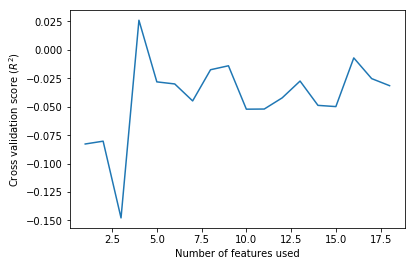

In [47]:
from sklearn.feature_selection import RFECV

feature_elimination = RFECV(estimator=model, cv=5, scoring='r2')
feature_elimination.fit(X_train, y_train)

rfecv_scores = feature_elimination.grid_scores_
plt.plot(range(1, len(rfecv_scores) + 1), rfecv_scores)
plt.xlabel('Number of features used')
plt.ylabel(r'Cross validation score ($R^2$)');

## Regularization

When we have too many features, our observations become sparse, making it hard to detect trends in the data. Our model begins to simply memorize the training set based on the many features. We can also say our model is fitting _noise_ instead of trend, because small random variations across many features results in observations being very separated.

One way to limit overfitting due to high dimensionality is _regularization_. To regularize a model, we introduce a penalty in the cost function associated with the values of model parameters themselves. For example, we could regularize our linear regression model by changing the cost function.

$$ C({\beta_i}) = \sum_j (y_j - X_{ij}\beta_i)^2 \Longrightarrow
C({\beta_i}) = \sum_j (y_j - X_{ij}\beta_i)^2 + \alpha\sum_i\beta_i^2 $$

The new cost function will tend to reduce the values of model parameters, limiting the effect of unimportant features. We could choose other penalties (e.g. $\alpha\sum_i\|\beta_i\|$) to change the effects of regularization.

In [1]:
from sklearn.linear_model import Ridge, Lasso
X_train, X_test, y_train, y_test = train_test_split(*shuffle(cali_df, cali_data.target), test_size=0.1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

lin_reg = LinearRegression().fit(X_train, y_train)

alphas = np.logspace(-2, 2, 100)
ridge_coefs = []
ridge_scores = []
lasso_coefs = []
lasso_scores = []
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha).fit(X_train, y_train)
    lasso_reg = Lasso(alpha=alpha).fit(X_train, y_train)
    ridge_coefs.append(ridge_reg.coef_)
    ridge_scores.append(r2_score(y_test, ridge_reg.predict(scaler.transform(X_test))))
    lasso_coefs.append(lasso_reg.coef_)
    lasso_scores.append(r2_score(y_test, lasso_reg.predict(scaler.transform(X_test))))

lin_score = r2_score(y_test, lin_reg.predict(scaler.transform(X_test)))
print('Linear regression score: %0.2f' % lin_score)
print('Ridge regression score: %0.2f' % max(ridge_scores))
print('Lasso regression score: %0.2f' % max(lasso_scores))

NameError: name 'train_test_split' is not defined

In [ ]:
plt.figure()
plt.gca().set_xscale('log')
plt.gca().set_ylim([.5, .625])
plt.plot(alphas, np.repeat(lin_score, len(alphas)), label='simple')
plt.plot(alphas, ridge_scores, label='ridge')
plt.plot(alphas, lasso_scores, label='lasso')
plt.xlabel(r'Regularization strength ($\alpha$)')
plt.ylabel(r'$R^2$ score')
plt.legend();